# 初めてのベイズ分類器を実装する

In [2]:
from sklearn import datasets
X, y = datasets.make_blobs(100, 2, centers=2, random_state=1701, cluster_std=2)

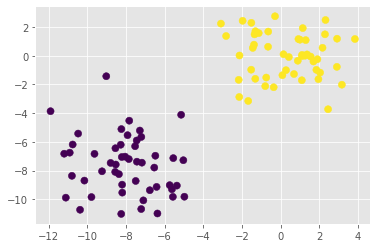

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In [4]:
import numpy as np
from sklearn import model_selection as ms
X = X_train, X_test, y_train, y_test = ms.train_test_split(
    X, y, test_size = 0.1
)

#### 正規分布型ベイズ分類器でデータを分類する

In [8]:
import cv2
model_norm = cv2.ml.NormalBayesClassifier_create()
model_norm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/ml/src/data.cpp:257: error: (-215:Assertion failed) samples.type() == CV_32F || samples.type() == CV_32S in function 'setData'


In [9]:
y_pred = model.norm.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

NameError: name 'model' is not defined

In [11]:
def plot_decision_boundary(model, X_test, y_test):
    h = 0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 1] + 1
    y_min, y_max = X_test[:, 0].min() - 1, X_test[:, 1] + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    x_hypo = np.column_stack((xx.ravel().astype(np.float32), 
                              yy.ravel().astype(np.float32))
    ret = model.predict(X_hypo)
    if isinstance(ret, tuple):
        zz = ret[1]
    else:
        zz = ret
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X_test[;, 0], X_test[:, 1], c = y_test, s=200)

SyntaxError: invalid syntax (1457581077.py, line 9)

In [12]:
plot_decision_boundary(model_norm, X, y)

NameError: name 'plot_decision_boundary' is not defined

In [13]:
ret, y_pred, y_proba = model_norm.predictProb(X_test)

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/ml/src/nbayes.cpp:316: error: (-5:Bad argument) The input samples must be 32f matrix with the number of columns = nallvars in function 'predictProb'


In [14]:
y_proba.round(2)

NameError: name 'y_proba' is not defined

#### 単純ベイズ分類器でデータを分類

In [16]:
from sklearn import naive_bayes
model_naive = naive_bayes.GaussianNB()

In [17]:
model_naive.fit(X_train, y_train)

GaussianNB()

In [18]:
model_naive.score(X_test, y_test)

1.0

In [19]:
yprob = model_naive.predict_proba(X_test)
yprob.round(2)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [20]:
plot_decision_boundary(model_naive, X, y)

NameError: name 'plot_decision_boundary' is not defined

#### 条件付き確率の可視化

In [21]:
def plot_proba(model, X_test, y_test):
    h = 0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].min() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    X_hypo = np.column_stack(xx.ravel().astype(np.float32), 
                             yy.ravel().astype(np.float32))
    if hasattr(model, 'predictProb'):
        _, _, y_proba = model.predictProb(X_hypo)
    else:
        y_proba = model.predict_proba(X_hypo)
    zz = y_proba[:, 1] - y_proba[:, 0]
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap = plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

In [22]:
plot_proba(model_naive, X, y)

TypeError: list indices must be integers or slices, not tuple